In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import itertools
import statsmodels.api as sm
from statsmodels.tsa.api import ExponentialSmoothing

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)
path = '/content/drive/MyDrive/01_ITE/Projects/Data_Science/datasets/'
cumtd_data = '00CUMTD_Route_Ridership_By_Day_September_2022_2023.csv'
data_file = path + cumtd_data # get the directory of the file

Mounted at /content/drive


In [5]:
import os # if you want to be inside this directory
os.chdir('/content/drive/MyDrive/01_ITE/Projects/Data_Science')

In [6]:
ls

5_East_West.ipynb                          ITE_Data_Science_EOH_2024_Presentation.pptx
Brandon_Teal.ipynb                         ITE_Data_Science_Notes.gdoc
Bus_Route_To_Analyze.gsheet                ITE_Data_Science_Rosters.gsheet
CUMTD_Bus_Routes_Main_Data_Analysis.ipynb  ITE_UIUC_ML.ipynb
CUMTD_Ridership_Per_Stop.csv               Louis_Yellow_Route.ipynb
Data_Science_Project_Outline.gdoc          Mitchell_Orange.ipynb
datasets/                                  Transportation_Data_Science_Project.gdoc
figures/


In [7]:
dataframe = pd.read_csv(data_file) # read in the csv file
dataframe

,Date,Line,In (Sum),Out (Sum),Load (Avg.),Load max,#APC-Trips
0,2022-08-31T19:00:00-05:00,1 YELLOW ALT,34,34,8.1,33,2
1,2022-08-31T19:00:00-05:00,10W GOLD ALT,47,47,14.6,43,1
2,2022-08-31T19:00:00-05:00,1N YELLOW ALT,140,140,24.0,87,2
3,2022-08-31T19:00:00-05:00,1N YELLOW ALT PM,41,41,15.5,41,1
4,2022-08-31T19:00:00-05:00,1S YELLOW ALT,120,120,8.2,56,3
...,...,...,...,...,...,...,...
15774,2023-09-29T19:00:00-05:00,TEAL LATE NIGHT SATURDAY,163,163,3.2,21,16
15775,2023-09-29T19:00:00-05:00,TEAL SATURDAY,"1,980","1,980",9.0,53,74
15776,2023-09-29T19:00:00-05:00,YELLOW EVENING SATURDAY,868,868,6.0,79,26
15777,2023-09-29T19:00:00-05:00,YELLOW LATE NIGHT SATURDAY,79,79,0.7,13,21


In [8]:
columns_to_traverse = dataframe.keys()[2:] # these are the columns we will be traversing for out data analysis
columns_to_traverse

Index(['In (Sum)', 'Out (Sum)', 'Load (Avg.)', 'Load max', '#APC-Trips'], dtype='object')

In [9]:
dataframe['Date'] = pd.to_datetime(dataframe['Date'])
dataframe

,Date,Line,In (Sum),Out (Sum),Load (Avg.),Load max,#APC-Trips
0,2022-08-31 19:00:00-05:00,1 YELLOW ALT,34,34,8.1,33,2
1,2022-08-31 19:00:00-05:00,10W GOLD ALT,47,47,14.6,43,1
2,2022-08-31 19:00:00-05:00,1N YELLOW ALT,140,140,24.0,87,2
3,2022-08-31 19:00:00-05:00,1N YELLOW ALT PM,41,41,15.5,41,1
4,2022-08-31 19:00:00-05:00,1S YELLOW ALT,120,120,8.2,56,3
...,...,...,...,...,...,...,...
15774,2023-09-29 19:00:00-05:00,TEAL LATE NIGHT SATURDAY,163,163,3.2,21,16
15775,2023-09-29 19:00:00-05:00,TEAL SATURDAY,"1,980","1,980",9.0,53,74
15776,2023-09-29 19:00:00-05:00,YELLOW EVENING SATURDAY,868,868,6.0,79,26
15777,2023-09-29 19:00:00-05:00,YELLOW LATE NIGHT SATURDAY,79,79,0.7,13,21


In [10]:
bus_lines = dataframe['Line'].unique() # we want to see how many unique bus lines there are
print(f'CUMTD bus lines: {bus_lines}')

CUMTD bus lines: ['1 YELLOW ALT' '10W GOLD ALT' '1N YELLOW ALT' '1N YELLOW ALT PM'
 '1S YELLOW ALT' '3S LAVENDER ALT' '5E GREEN EXPRESS 1 ALT'
 '5E GREEN EXPRESS ALT' '5W GREEN ALT 2' '5W GREEN EXPRESS 2'
 '7E GREY ALT' '7W GREY ALT' 'BLUE' 'BRONZE' 'BRONZE ALT' 'BROWN'
 'BROWN ALT' 'BROWN ALT PM' 'BROWN ALT1' 'GOLD' 'GOLD ALT' 'GOLDHOPPER'
 'GREEN' 'GREEN ALT' 'GREEN EVENING' 'GREEN EXPRESS' 'GREEN EXPRESS ALT'
 'GREEN LATE NIGHT' 'GREENHOPPER' 'GREENHOPPER EVENING' 'GREY' 'GREY ALT'
 'GREY EVENING' 'ILLINI' 'ILLINI EVENING' 'LAVENDER' 'LAVENDER ALT'
 'LIME EVENING' 'LINK' 'NAVY' 'ORANGE' 'ORANGE ALT' 'ORANGEHOPPER' 'PINK'
 'PINK ALT' 'RAVEN' 'RED' 'RUBY' 'RUBY EVENING' 'SILVER' 'SILVER EVENING'
 'SILVER LATE NIGHT' 'TEAL' 'TEAL EVENING' 'TEAL LATE NIGHT' 'YELLOW'
 'YELLOW EVENING' 'YELLOW LATE NIGHT' 'YELLOWHOPPER'
 'GREEN EVENING SATURDAY' 'GREEN LATE NIGHT SATURDAY' 'GREEN SATURDAY'
 'GREENHOPPER EVENING SATURDAY' 'GREY EVENING SATURDAY' 'GREY SATURDAY'
 'ILLINI EVENING SATURDAY' '

In [11]:
yellow_bus_lines = [line for line in bus_lines if "yellow" in line.lower()]
yellow_bus_lines

['1 YELLOW ALT',
 '1N YELLOW ALT',
 '1N YELLOW ALT PM',
 '1S YELLOW ALT',
 'YELLOW',
 'YELLOW EVENING',
 'YELLOW LATE NIGHT',
 'YELLOWHOPPER',
 'YELLOW EVENING SATURDAY',
 'YELLOW LATE NIGHT SATURDAY',
 'YELLOW SATURDAY',
 'YELLOW LATE NIGHT SUNDAY',
 'YELLOW SUNDAY']

In [12]:
# Define the list of line names you're interested in
lines_of_interest = yellow_bus_lines

# Filter the dataframe based on the list
filtered_dataframe = dataframe[dataframe['Line'].isin(lines_of_interest)]
filtered_dataframe

,Date,Line,In (Sum),Out (Sum),Load (Avg.),Load max,#APC-Trips
0,2022-08-31 19:00:00-05:00,1 YELLOW ALT,34,34,8.1,33,2
2,2022-08-31 19:00:00-05:00,1N YELLOW ALT,140,140,24.0,87,2
3,2022-08-31 19:00:00-05:00,1N YELLOW ALT PM,41,41,15.5,41,1
4,2022-08-31 19:00:00-05:00,1S YELLOW ALT,120,120,8.2,56,3
55,2022-08-31 19:00:00-05:00,YELLOW,"2,000","2,000",7.1,74,53
...,...,...,...,...,...,...,...
15755,2023-09-28 19:00:00-05:00,YELLOW LATE NIGHT,84,84,1.4,13,19
15756,2023-09-28 19:00:00-05:00,YELLOWHOPPER,814,814,8.0,59,33
15776,2023-09-29 19:00:00-05:00,YELLOW EVENING SATURDAY,868,868,6.0,79,26
15777,2023-09-29 19:00:00-05:00,YELLOW LATE NIGHT SATURDAY,79,79,0.7,13,21


In [13]:
for key in columns_to_traverse:
    filtered_dataframe[key] = filtered_dataframe[key].replace(',', '', regex=True)
    filtered_dataframe[key] = filtered_dataframe[key].astype('float64')

In [14]:
filtered_dataframe

,Date,Line,In (Sum),Out (Sum),Load (Avg.),Load max,#APC-Trips
0,2022-08-31 19:00:00-05:00,1 YELLOW ALT,34.0,34.0,8.1,33.0,2.0
2,2022-08-31 19:00:00-05:00,1N YELLOW ALT,140.0,140.0,24.0,87.0,2.0
3,2022-08-31 19:00:00-05:00,1N YELLOW ALT PM,41.0,41.0,15.5,41.0,1.0
4,2022-08-31 19:00:00-05:00,1S YELLOW ALT,120.0,120.0,8.2,56.0,3.0
55,2022-08-31 19:00:00-05:00,YELLOW,2000.0,2000.0,7.1,74.0,53.0
...,...,...,...,...,...,...,...
15755,2023-09-28 19:00:00-05:00,YELLOW LATE NIGHT,84.0,84.0,1.4,13.0,19.0
15756,2023-09-28 19:00:00-05:00,YELLOWHOPPER,814.0,814.0,8.0,59.0,33.0
15776,2023-09-29 19:00:00-05:00,YELLOW EVENING SATURDAY,868.0,868.0,6.0,79.0,26.0
15777,2023-09-29 19:00:00-05:00,YELLOW LATE NIGHT SATURDAY,79.0,79.0,0.7,13.0,21.0


In [15]:
#filtered_dataframe = filtered_dataframe.asfreq('D')
filtered_dataframe = filtered_dataframe.set_index('Date')
filtered_dataframe.index

Index([2022-08-31 19:00:00-05:00, 2022-08-31 19:00:00-05:00,
       2022-08-31 19:00:00-05:00, 2022-08-31 19:00:00-05:00,
       2022-08-31 19:00:00-05:00, 2022-08-31 19:00:00-05:00,
       2022-08-31 19:00:00-05:00, 2022-08-31 19:00:00-05:00,
       2022-09-01 19:00:00-05:00, 2022-09-01 19:00:00-05:00,
       ...
       2023-09-28 19:00:00-05:00, 2023-09-28 19:00:00-05:00,
       2023-09-28 19:00:00-05:00, 2023-09-28 19:00:00-05:00,
       2023-09-28 19:00:00-05:00, 2023-09-28 19:00:00-05:00,
       2023-09-28 19:00:00-05:00, 2023-09-29 19:00:00-05:00,
       2023-09-29 19:00:00-05:00, 2023-09-29 19:00:00-05:00],
      dtype='object', name='Date', length=1944)

In [16]:
mask = filtered_dataframe['Line'] == 'YELLOW'
yellow = filtered_dataframe[mask]
yellow

,Line,In (Sum),Out (Sum),Load (Avg.),Load max,#APC-Trips
Date,,,,,,
2022-08-31 19:00:00-05:00,YELLOW,2000.0,2000.0,7.1,74.0,53.0
2022-09-01 19:00:00-05:00,YELLOW,1987.0,1987.0,8.2,49.0,53.0
2022-09-05 19:00:00-05:00,YELLOW,1915.0,1915.0,7.6,54.0,53.0
2022-09-06 19:00:00-05:00,YELLOW,1877.0,1877.0,6.4,57.0,51.0
2022-09-07 19:00:00-05:00,YELLOW,2025.0,2025.0,6.5,50.0,58.0
...,...,...,...,...,...,...
2023-09-24 19:00:00-05:00,YELLOW,1963.0,1963.0,6.8,57.0,50.0
2023-09-25 19:00:00-05:00,YELLOW,2094.0,2094.0,6.9,50.0,55.0
2023-09-26 19:00:00-05:00,YELLOW,2238.0,2238.0,6.7,63.0,57.0


In [17]:
yellow.isnull().sum()

Line           0
In (Sum)       0
Out (Sum)      0
Load (Avg.)    0
Load max       0
#APC-Trips     0
dtype: int64

In [18]:
def plot_data(yellow,y_var):
  y = yellow[y_var]
  y = y.asfreq('D')
  y = y.fillna(y.mean())
  plt.figure(figsize=(20, 6))
  plt.plot(y, label='Observed Data', color='blue')
  #plt.title('Load max for Yellow Line')
  plt.xlabel('Time')
  plt.ylabel(y_var)
  plt.savefig('figures/Louis_Yellow/observations/Louis_yellow'+y_var+'.png')

In [19]:
def forecast(yellow,y_var,step_var):
  y = yellow[y_var]
  y = y.asfreq('D')
  y = y.fillna(y.mean())

  model = ExponentialSmoothing(y, seasonal='mul', seasonal_periods=160).fit()
  y_forecasted = model.forecast(steps=step_var)
  print(y_var)
  plt.figure(figsize=(20, 6))
  plt.plot(y, label='Observed', color='blue')
  plt.plot(y_forecasted, label='Forecast', color='red')
  #plt.title(y_var+' Forecast using Holt-Winters Method for Yellow Line')
  plt.xlabel('Time')
  plt.ylabel(y_var)
  plt.legend()
  print(type(y_forecasted))
  print(y_forecasted)

  forecast_df = pd.DataFrame(y_forecasted, columns=['Forecasted Value'])

  # Resetting the index to turn the dates into a separate column
  forecast_df.reset_index(inplace=True)
  forecast_df.rename(columns={'index': 'Date'}, inplace=True)

  forecast_df.to_csv('figures/Louis_Yellow/predictions/Louis_yellow_predictions_data' + y_var + '.csv',index=False)
  plt.savefig('figures/Louis_Yellow/predictions/Louis_yellow_predictions'+y_var+'.png')

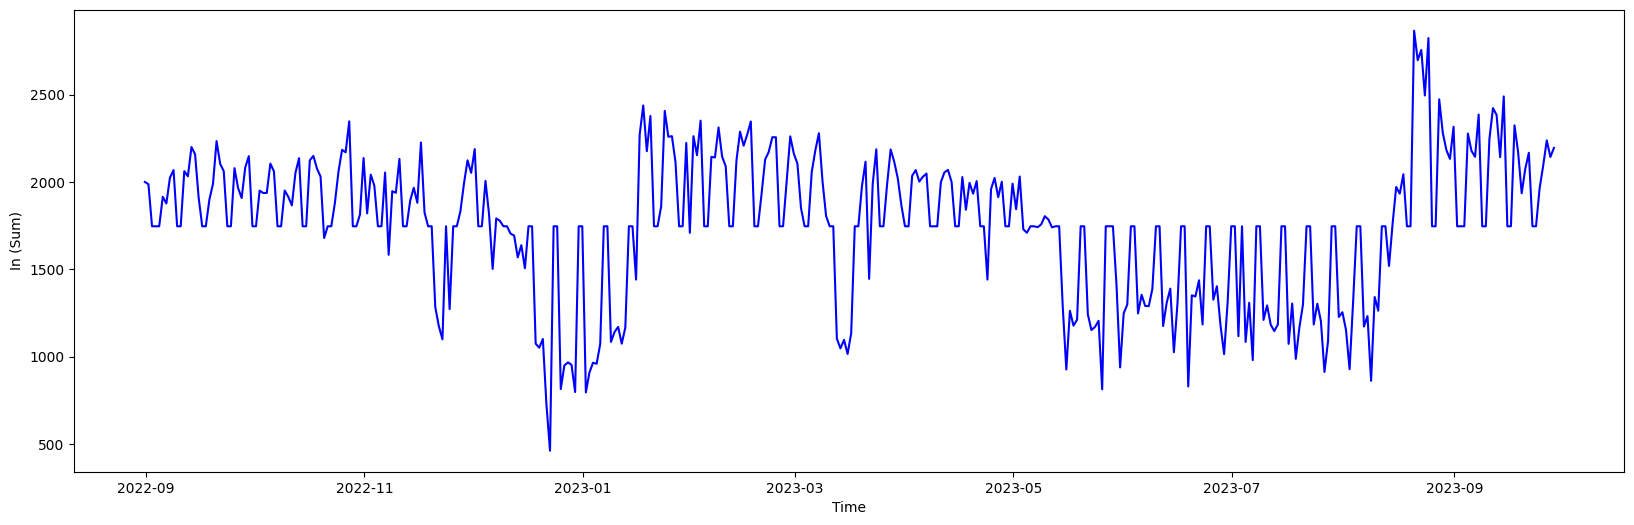

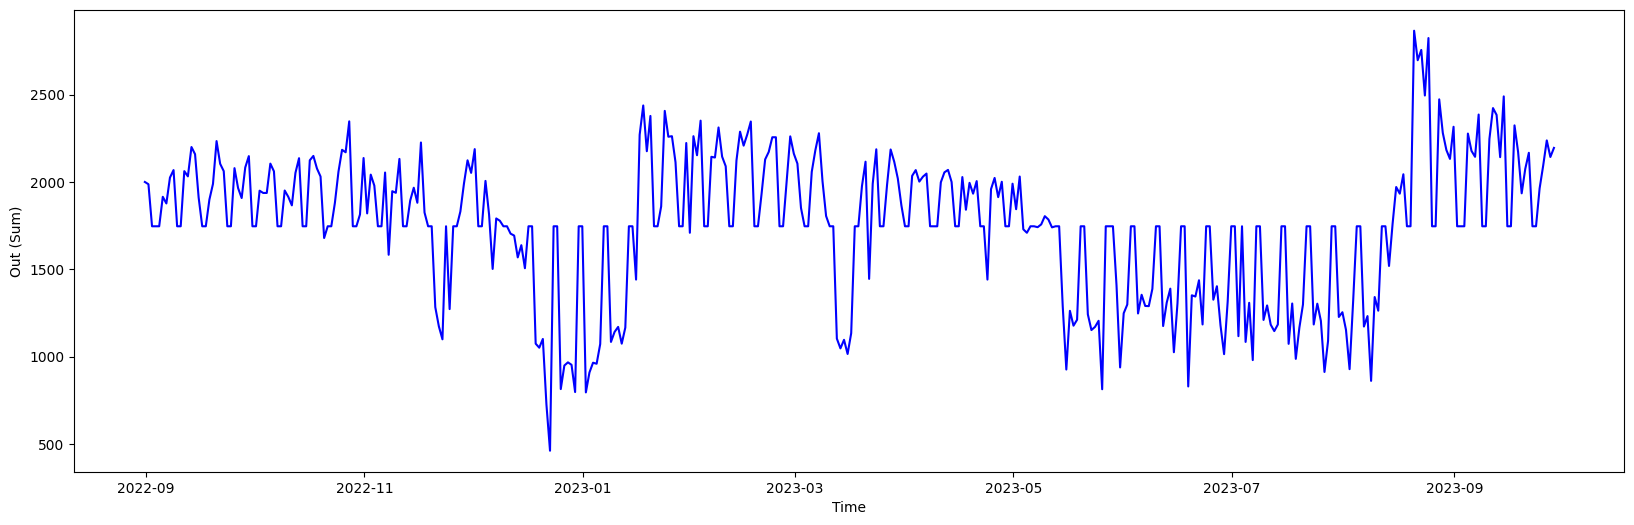

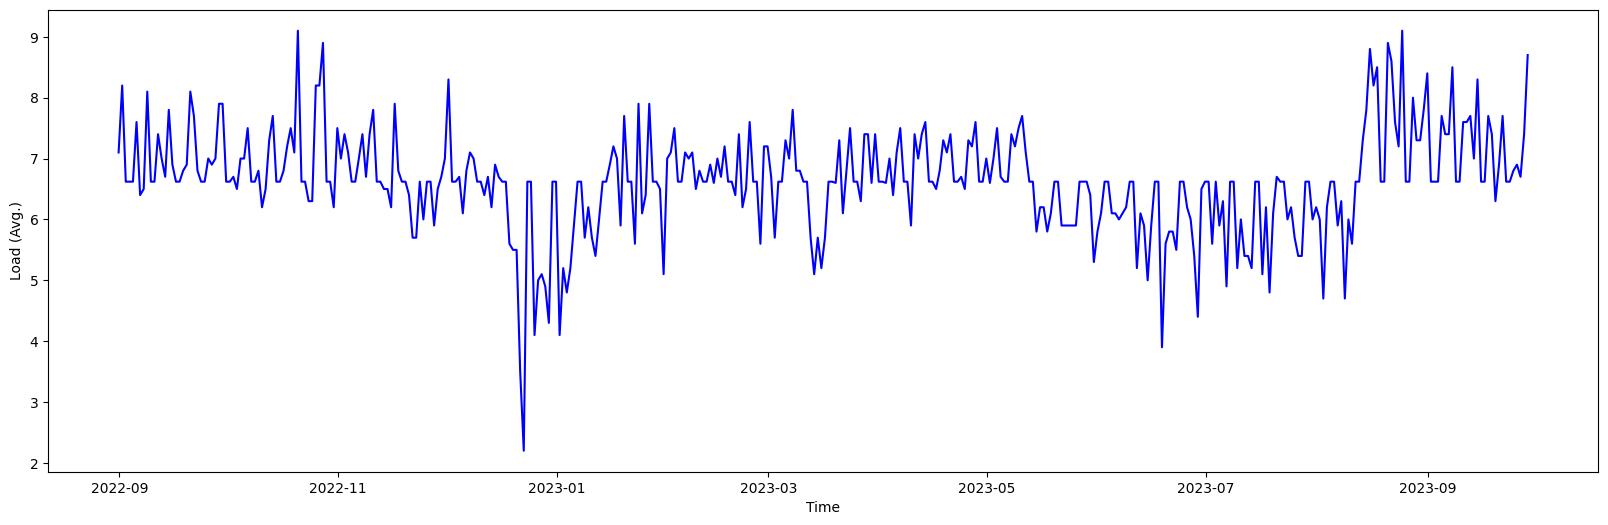

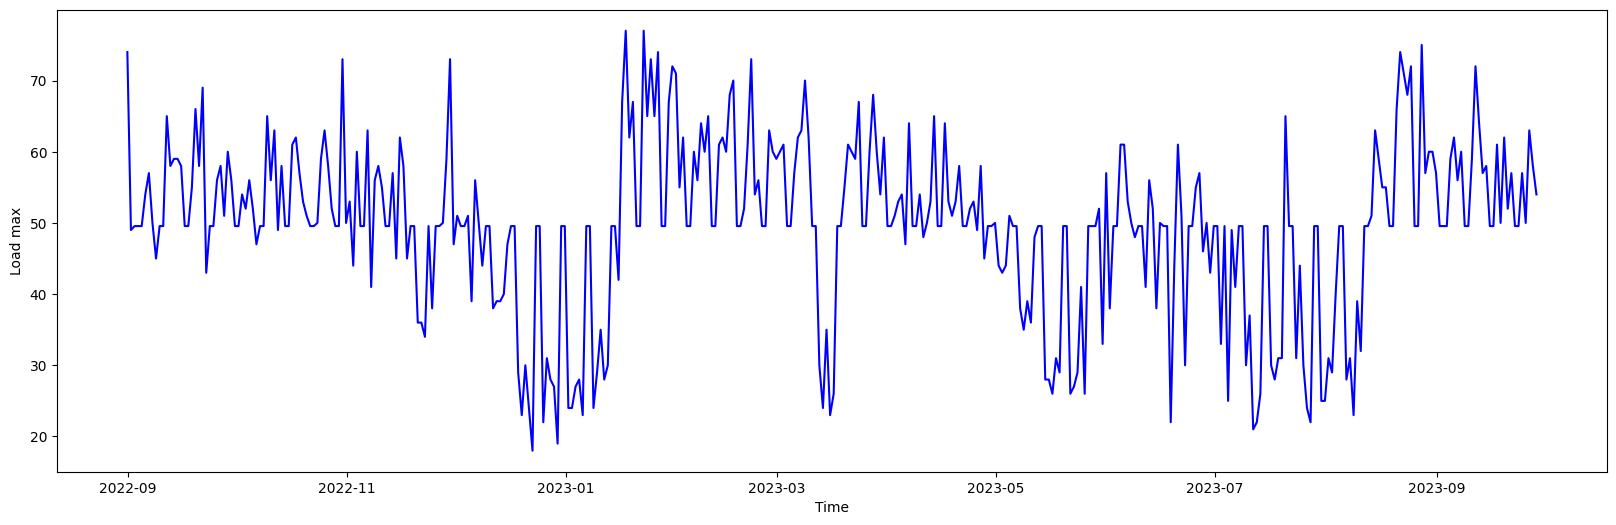

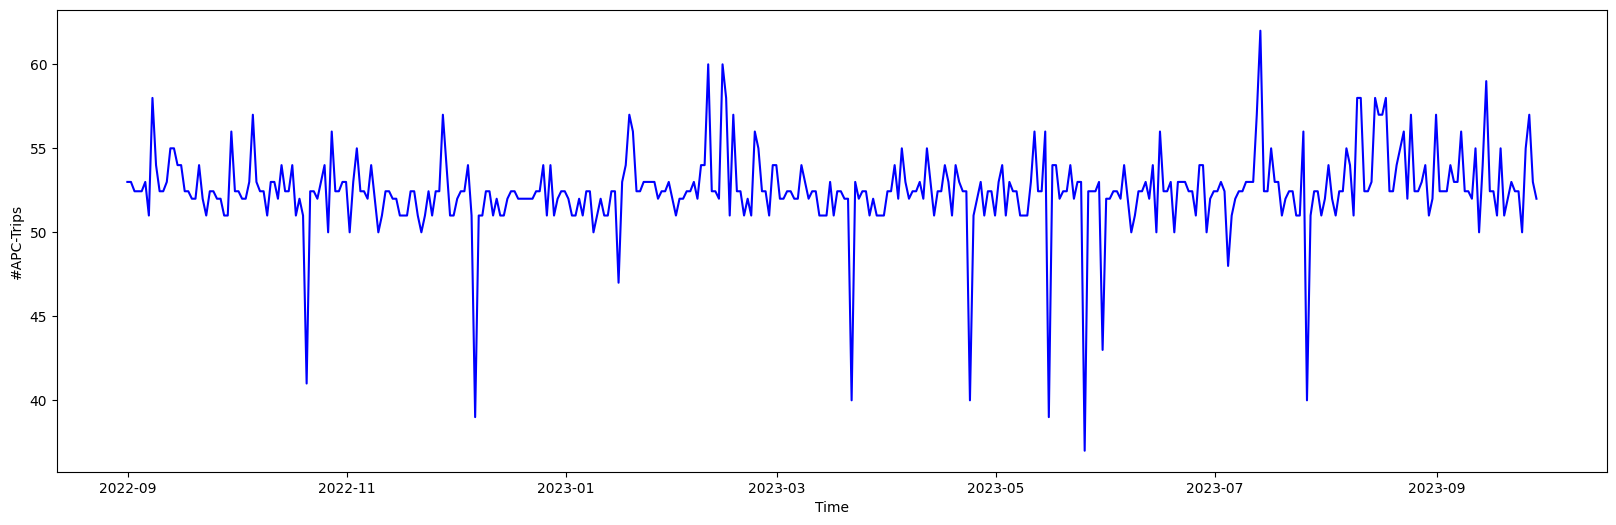

In [20]:
for yv in columns_to_traverse:
  plot_data(yellow,yv)

In [ ]:
steps = [256,256,256,256]
for yv,step in zip(columns_to_traverse,steps):
  forecast(yellow,yv,step)

In (Sum)
<class 'pandas.core.series.Series'>
2023-09-29 19:00:00-05:00    2074.210719
2023-09-30 19:00:00-05:00    1942.325443
2023-10-01 19:00:00-05:00    2302.568630
2023-10-02 19:00:00-05:00    2485.421175
2023-10-03 19:00:00-05:00    2231.906375
                                ...     
2024-06-06 19:00:00-05:00    2173.694617
2024-06-07 19:00:00-05:00    1881.197346
2024-06-08 19:00:00-05:00    2042.658764
2024-06-09 19:00:00-05:00    2069.081810
2024-06-10 19:00:00-05:00    1879.480494
Freq: D, Length: 256, dtype: float64
Out (Sum)
<class 'pandas.core.series.Series'>
2023-09-29 19:00:00-05:00    2074.210719
2023-09-30 19:00:00-05:00    1942.325443
2023-10-01 19:00:00-05:00    2302.568630
2023-10-02 19:00:00-05:00    2485.421175
2023-10-03 19:00:00-05:00    2231.906375
                                ...     
2024-06-06 19:00:00-05:00    2173.694617
2024-06-07 19:00:00-05:00    1881.197346
2024-06-08 19:00:00-05:00    2042.658764
2024-06-09 19:00:00-05:00    2069.081810
2024-06-10 